# Tutorial 03 Time 
## Exploration A

In [1]:
"""
Libaries that are used 
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read data into a variable using Pandas via a URL and convert the index to time date 

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
data.index = pd.to_datetime(data.index)

Check the data by calling the head function and the sum function

In [3]:
print(data.head())

             001  002  003  004  005  006  007  008  009  010  ...  158  159  \
Date                                                           ...             
2019-01-01  1062   33   67   42    0    4    0    0    1   69  ...    0    0   
2019-01-02   976   41   72   19    2    0    0   14    1   62  ...    5    0   
2019-01-03   956   27   71   28    4    6   11    0    0   64  ...    0    0   
2019-01-04   976   30   57   29    0    0    3    0    2   52  ...    0    2   
2019-01-05   956   45   65   27    4    1    0    0    0   55  ...   12    0   

            160  161  162  163  164  165  166  167  
Date                                                
2019-01-01    4    0   10    2    2    2    0    0  
2019-01-02    0    7    0    0    0    0    1    3  
2019-01-03    0    0    6    0    0    3    0    0  
2019-01-04    0    0    0    0    0    0    0    7  
2019-01-05    0    4    0    0    0    0    5    2  

[5 rows x 167 columns]


Using the information from the sum function, there the file contains 5 rows and 167 columns

In [4]:
"""
Function to display data defined here to reduce repition of code thoughout the workbook
"""
def displayFigure(Data, figX, FigY, linewidth1, 
                  xlabel, ylabel, title, showLegend = False,
                 showRollingData = False, rollingData = 0,
                  linewidth2 = 0, showTrendLine= False):
    
    plt.figure(figsize=(figX, FigY))
    plt.plot(Data, linewidth=linewidth1)
    
    """
    if block to display a rolling average 
    - inputs 
        showRollingData = Boolen
        rollingData = List
        linewidth = int 
    
    - outputs
        plot of average for data over time
    """
    if(showRollingData == True):
        plt.gca().set_prop_cycle(None) # reset colours
        plt.plot(rollingData, linewidth=linewidth2)
        
    """
    if block to add trend line
    - inputs
        showTrendLine = Boolen
        selected = list
    - outputs
        trend plot using selected data
    """
    if(showTrendLine == True):
        plt.gca().set_prop_cycle(None) # reset colours
        for name in selected:
            x = np.arange(len(data[name]))
            z = np.polyfit(x, data[name], 1)
            trend = np.poly1d(z)
            plt.plot(data.index, trend(x), linestyle='--')
            
            
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=20)
    if(showLegend == True):
        plt.legend(selected, loc=2)
    plt.show()

## 1. Inital Exploration

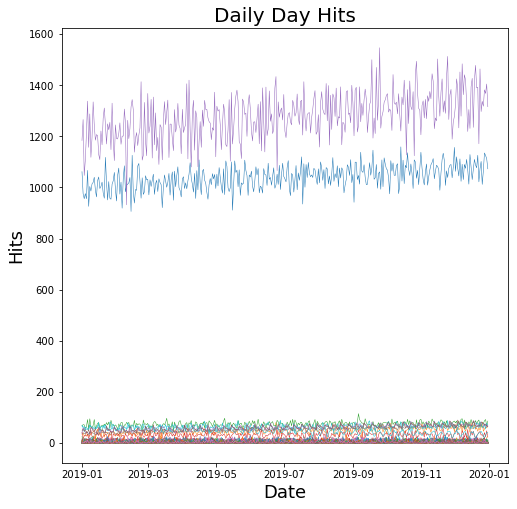

In [5]:
displayFigure(data, # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Hits", # y label
              "Daily Day Hits") # Title

With a overview of every page the company has, we can see that there are two high volume pages. 

As the company would like to boost the hits to other pages removing them and revisualising this graph to show more relevant data.

## 2. Disply Medium Volume Pages

In [6]:
selected =['002', '003' , '004' , '010', '048', '080', '155', '156']

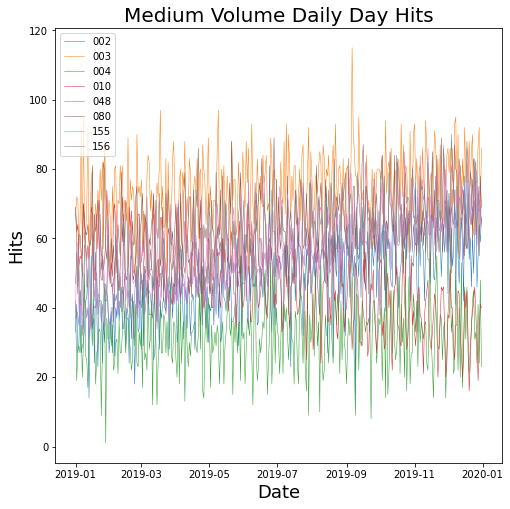

In [7]:
displayFigure(data[selected], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Hits", # y label
              "Medium Volume Daily Day Hits", # Title
              showLegend = True) # Display legend
              

Displaying eight of the pages that have had medium traffic, but it is hard to distinguish different pages in this graph. 

We can extract relatively easily that page 003 has the highest number of hits and page 004 has the lowest.

## 3. Medium Volume With 14-Day Rolling Average

In [8]:
period = 14 # variable used to specify the number of days
rolling_average = data.rolling(window=period).mean() # using the rolling average 

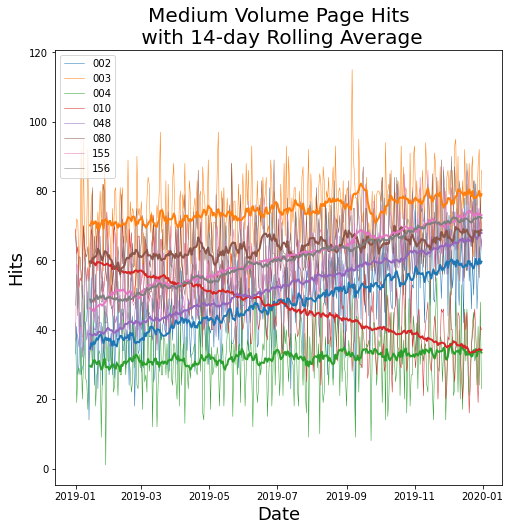

In [9]:
displayFigure(data[selected], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Hits", # y label
              "Medium Volume Page Hits\n with 14-day Rolling Average", # Title
              showLegend = True, # Display legend
              showRollingData = True, # Display Rolling average data
              rollingData = rolling_average[selected], # Rolling average data
              linewidth2 = 2) # linewidth for rolling average 

## 4. Inserting Trend Line

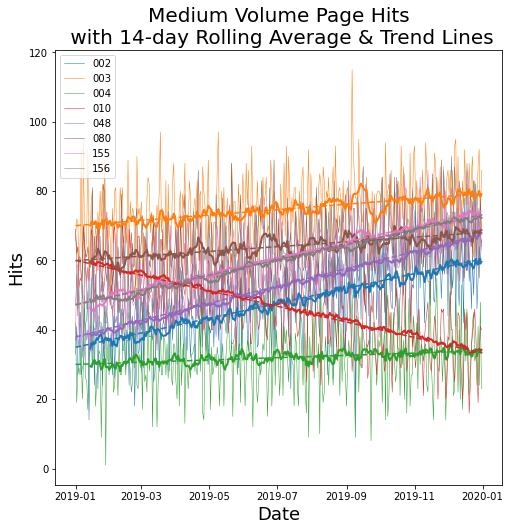

In [10]:
displayFigure(data[selected], # Data
              8, # fig size X
              8, # fig size Z
              0.5, # linewidth
              "Date", # xlabel
              "Hits", # y label
              "Medium Volume Page Hits\n with 14-day Rolling Average & Trend Lines", # Title
              showLegend = True, # Display legend
              showRollingData = True, # Display Rolling average data
              rollingData = rolling_average[selected], # Rolling average data
              linewidth2 = 2,# linewidth for rolling average 
              showTrendLine = True) # Show trendline

## 5. Beautifying The Chart

In [11]:
selected = ['003', '080', '010', '155', '156', '048', '002', '004']

Reording the list of selected items so that they are in order when displayed within the legend.

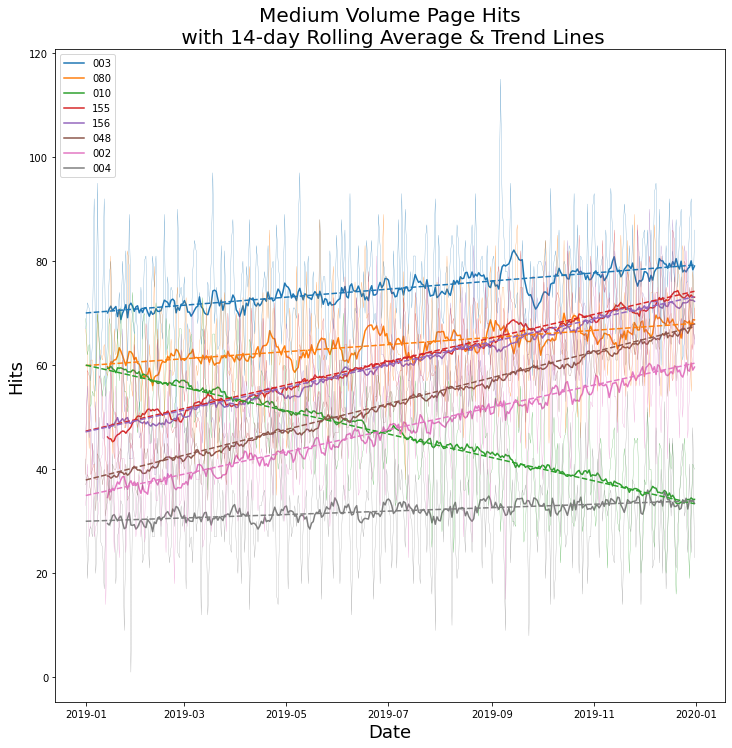

In [12]:
"""
By swapping the rolling average data and the selected data variables, we are able to 
make the legend clearer with thicker lines displaying for each column.
"""
displayFigure(rolling_average[selected], # Display Rolling average data
              12, # fig size X
              12, # fig size Z
              1.5, # linewidth
              "Date", # xlabel
              "Hits", # y label
              "Medium Volume Page Hits\n with 14-day Rolling Average & Trend Lines", # Title
              showLegend = True, # Display legend
              showRollingData = True, # data
              rollingData = data[selected], # Rolling average data
              linewidth2 = 0.2,# linewidth for rolling average 
              showTrendLine = True) # Show trendline

The general trend for these medium volume pages are a upward trend, the exception being page 010 which had a consistant downward trend over the period shown.